# Data Scientist Professional Practical Exam Submission



## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In this project, our purpose is to develop a predictive model that classify recipes likely to achieve approximately 80% rate of accuracy, while minimizing exposure to less popular options. We will start by validating the data, which includes removing duplicates, handling missing values, and ensuring proper column data types. Following this, we will conduct an in-depth data exploration to gain actionable insights. Based on these insights, we will build and evaluate an appropriate machine learning model. Finally, we will align our solution with key business metrics and offer recommendations for the business. 

The primary goal is to: 
- analyze the data to derive valuable insights that support more informed business decisions
- develop a highly accurate model to effectively predict recipes that will generate high traffic, allowing these recipes to receive greater emphasis and attention.
With the provided information, we aim to offer valuable insights on which recipes to feature on the homepage daily to boost traffic, potentially leading to an increase in subscriptions.


# Investigate the data

In [1]:
#importing necessary package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
#import the data set and check the first 5 rows
df = pd.read_csv('recipe_site_traffic_2212.csv')
print(df.head(20))

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]


In [3]:
#check the information of the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
#check for the description of numerical data
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [5]:
#check for missing data
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

There are a number of missing values in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns. However, there is a significant quantity of missing values in the 'high_traffic' column. For the purposes of our analysis, it is appropriate to interpret these missing values as indicating non-high traffic.


<AxesSubplot: >

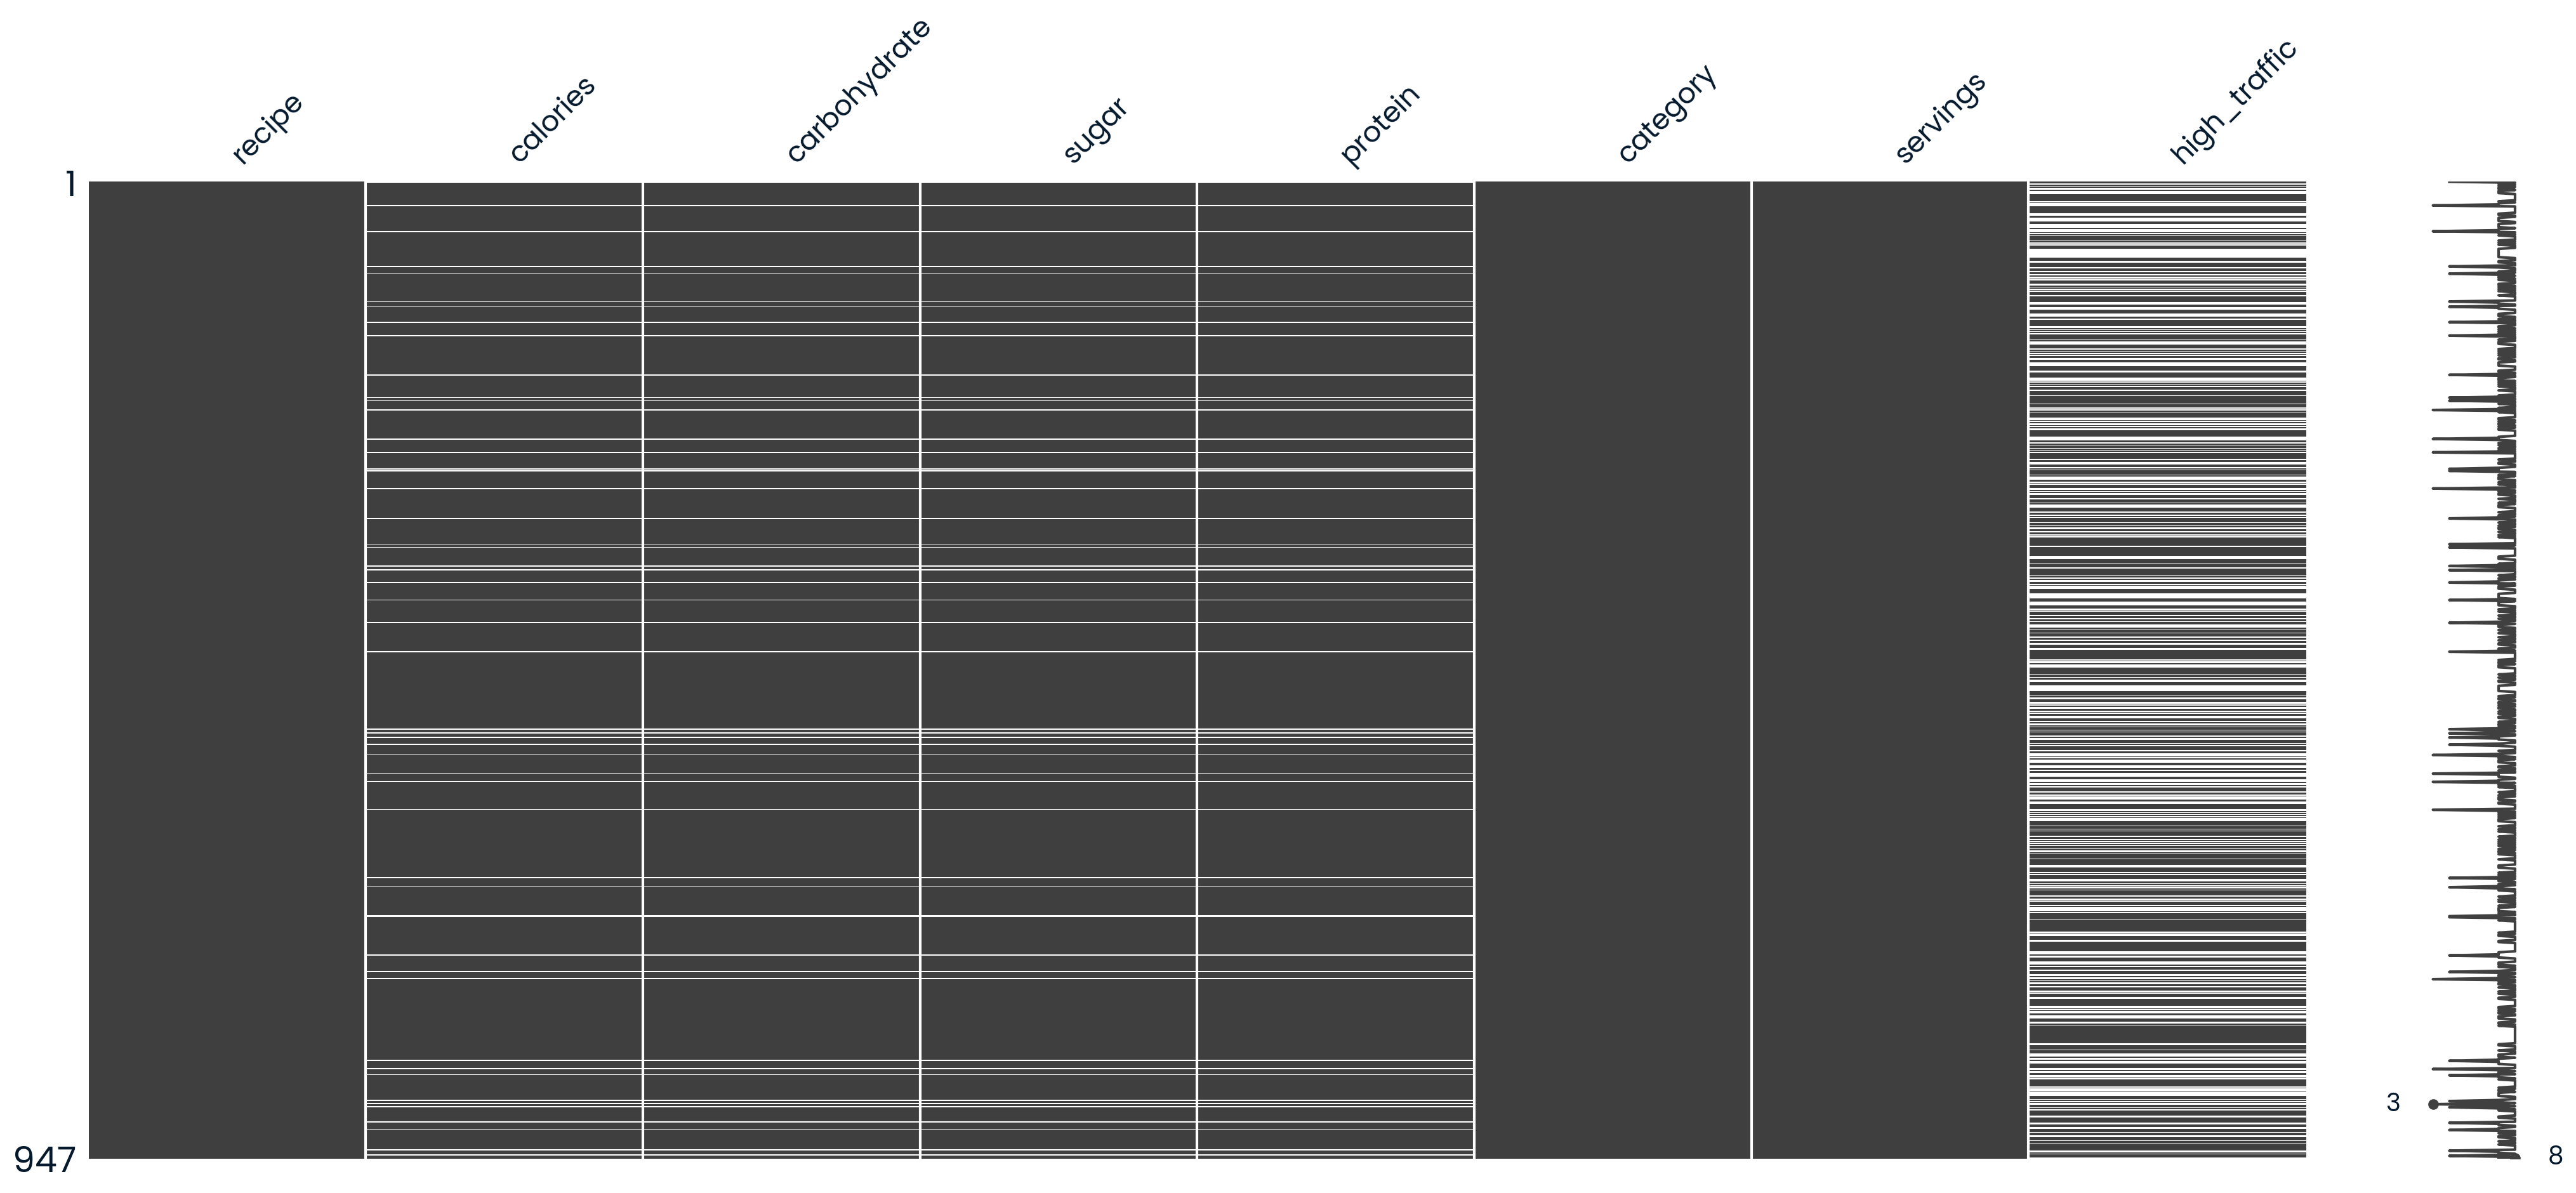

In [6]:
#visualize the missing data
msno.matrix(df)

In [7]:
#check for duplicated value using primary key
df.duplicated(subset='recipe').sum()

0

Using the primary key 'recipe' to check for suplicated, there is no duplicate row to remove

# Data Preprocessing

In [8]:
#check the value of 3 object columns
columns = ['servings', 'category', 'high_traffic']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for servings:
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64


Value counts for category:
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64


Value counts for high_traffic:
High    574
Name: high_traffic, dtype: int64




In [9]:
#cleaning 'serving' from irrelevant informations
df['servings'] = df['servings'].str.replace(" as a snack", "")
df['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [10]:
#converting data type of servings column to integer
df['servings'] = df['servings'].astype('int')


Given that the "servings" column exclusively contains integer values, we can convert its data type to integer. Although this column represents a numerical feature, it operates more as a categorical variable. We will maintain its numeric data type for the time being, with the understanding that it will need to be converted back to an integer format during the model development and evaluation stages.

Combine Chicken and Chicken Breast in 'category' since stipulated criteria did not mention Chicken Breast


In [138]:
#Combine the two value
df['category'] = df['category'].str.replace(" Breast", "")
df['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

In [12]:
#change data type of 'category' columns to category
df['category'] = df['category'].astype('category')

In [13]:
# fill missing values in 'high_traffic' with False and replace rows with value High with True
df['high_traffic'] = np.where(df['high_traffic'] == "High", True, False)
df['high_traffic'].value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

Since the target column is binary, it can be converted to boolean value

In [14]:
#re-check the summary of dataframe's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


## Handle missing data

In [15]:
#outline all the remaining missing values
df.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

<AxesSubplot: >

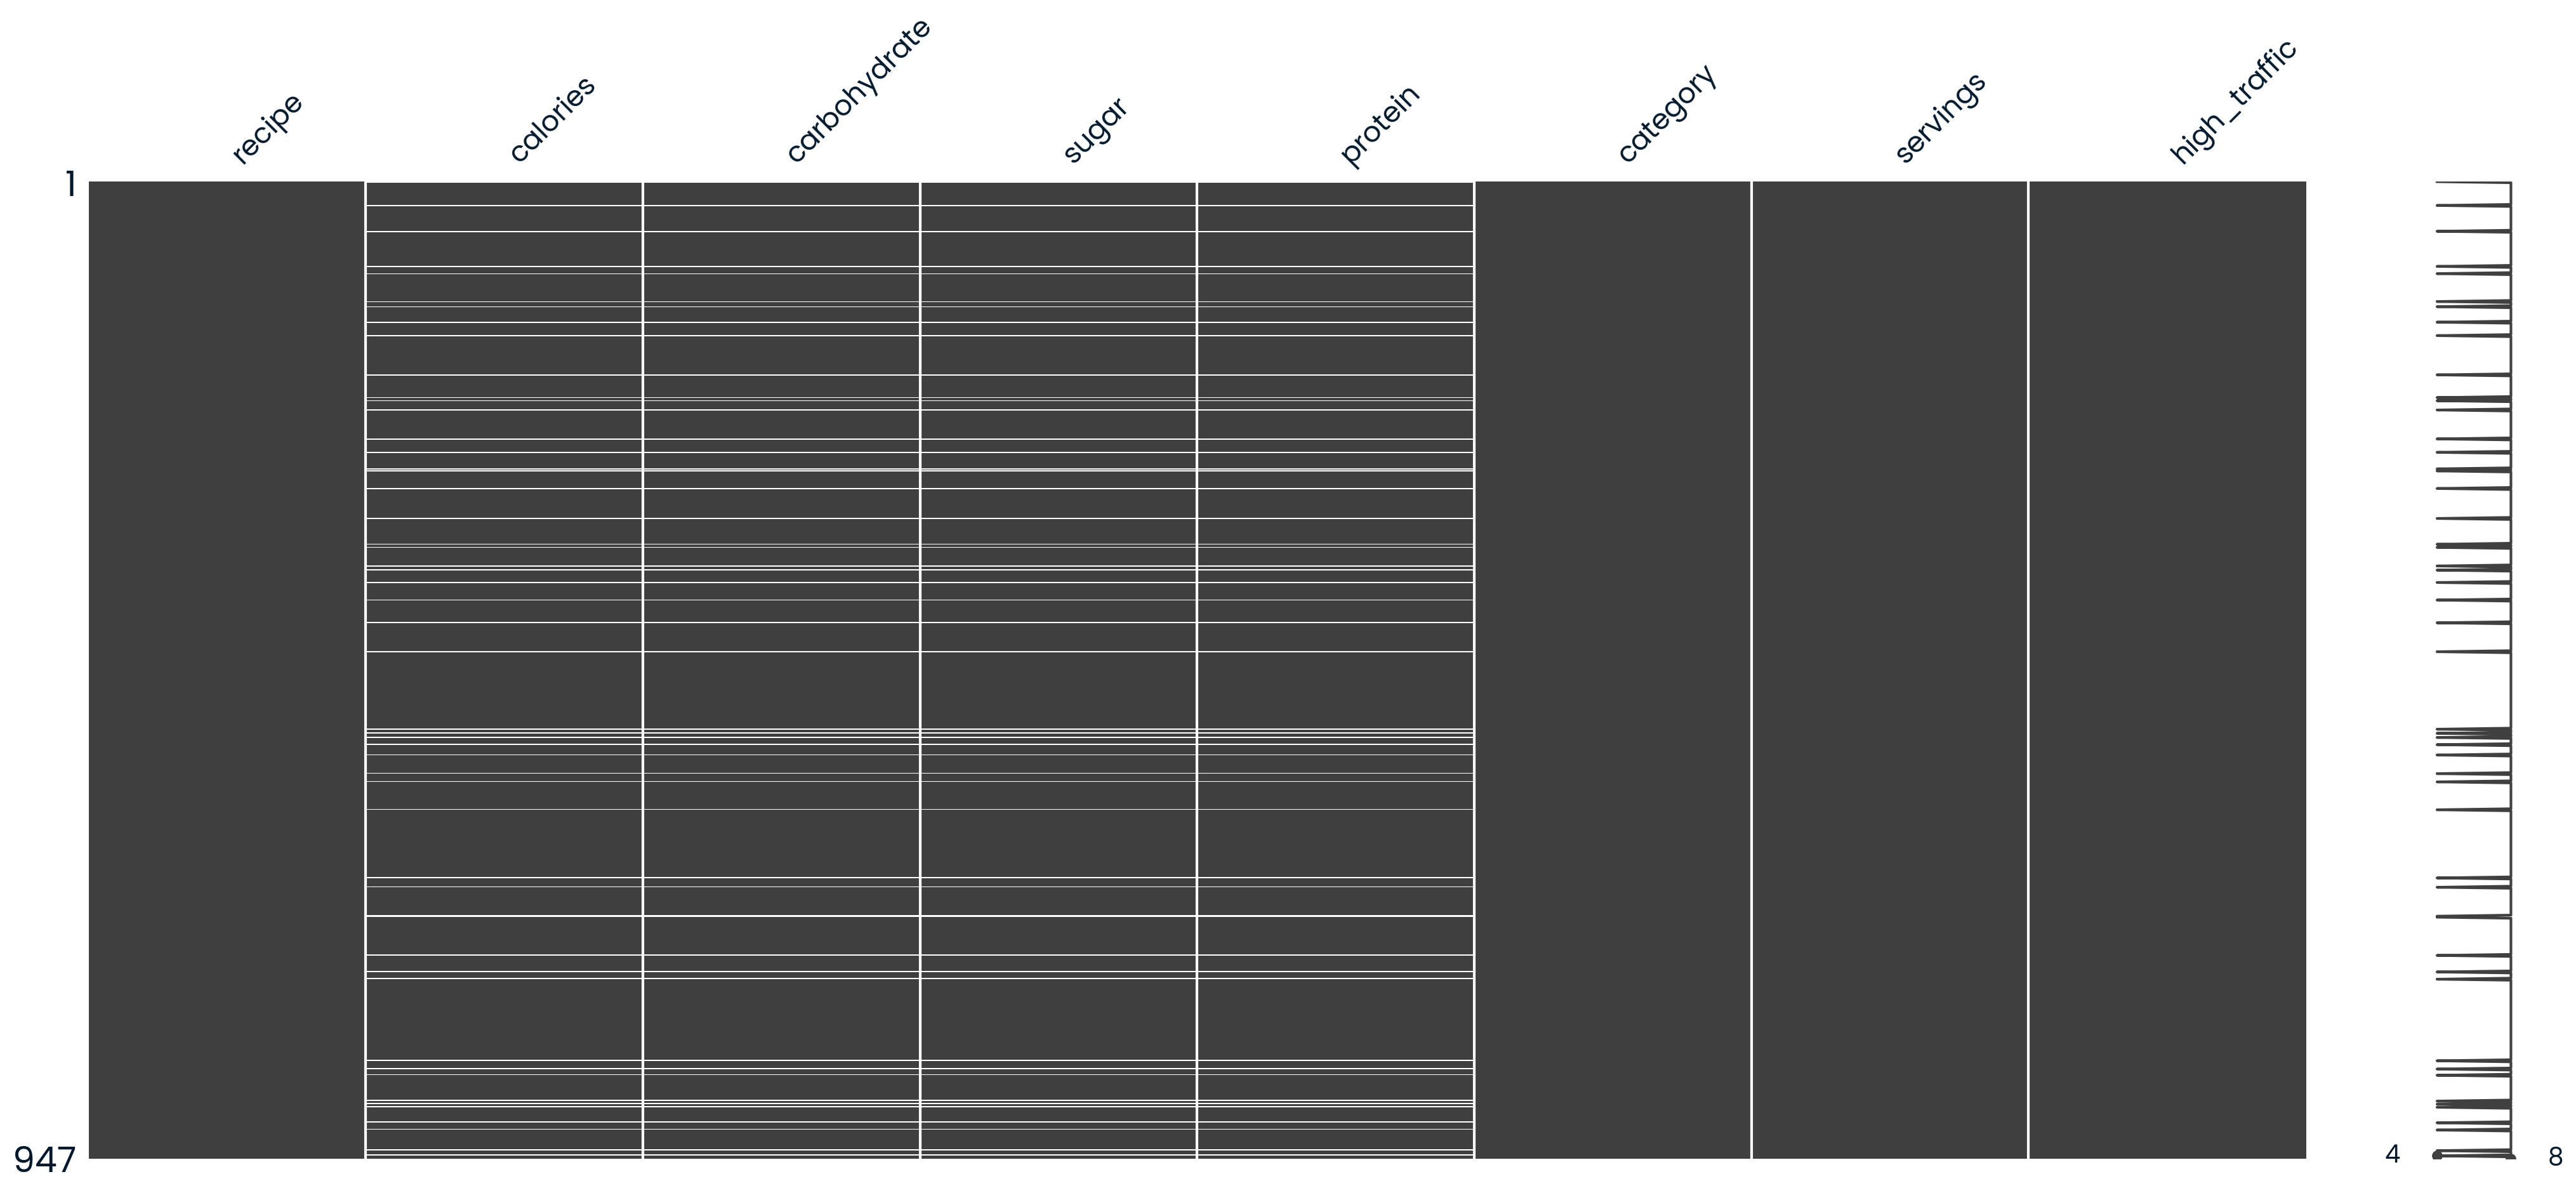

In [16]:
#visualize all the remaining missing values
msno.matrix(df)

Since the number of the remaining missing value is small and almost in the same rows, all of them can be dismissed

In [17]:
#drop all the remaining missing values
df = df.dropna().reset_index(drop=True)

In [18]:
#re-check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 44.2 KB


# EDA

Examine the overall correlation within the entire dataset to identify any general patterns

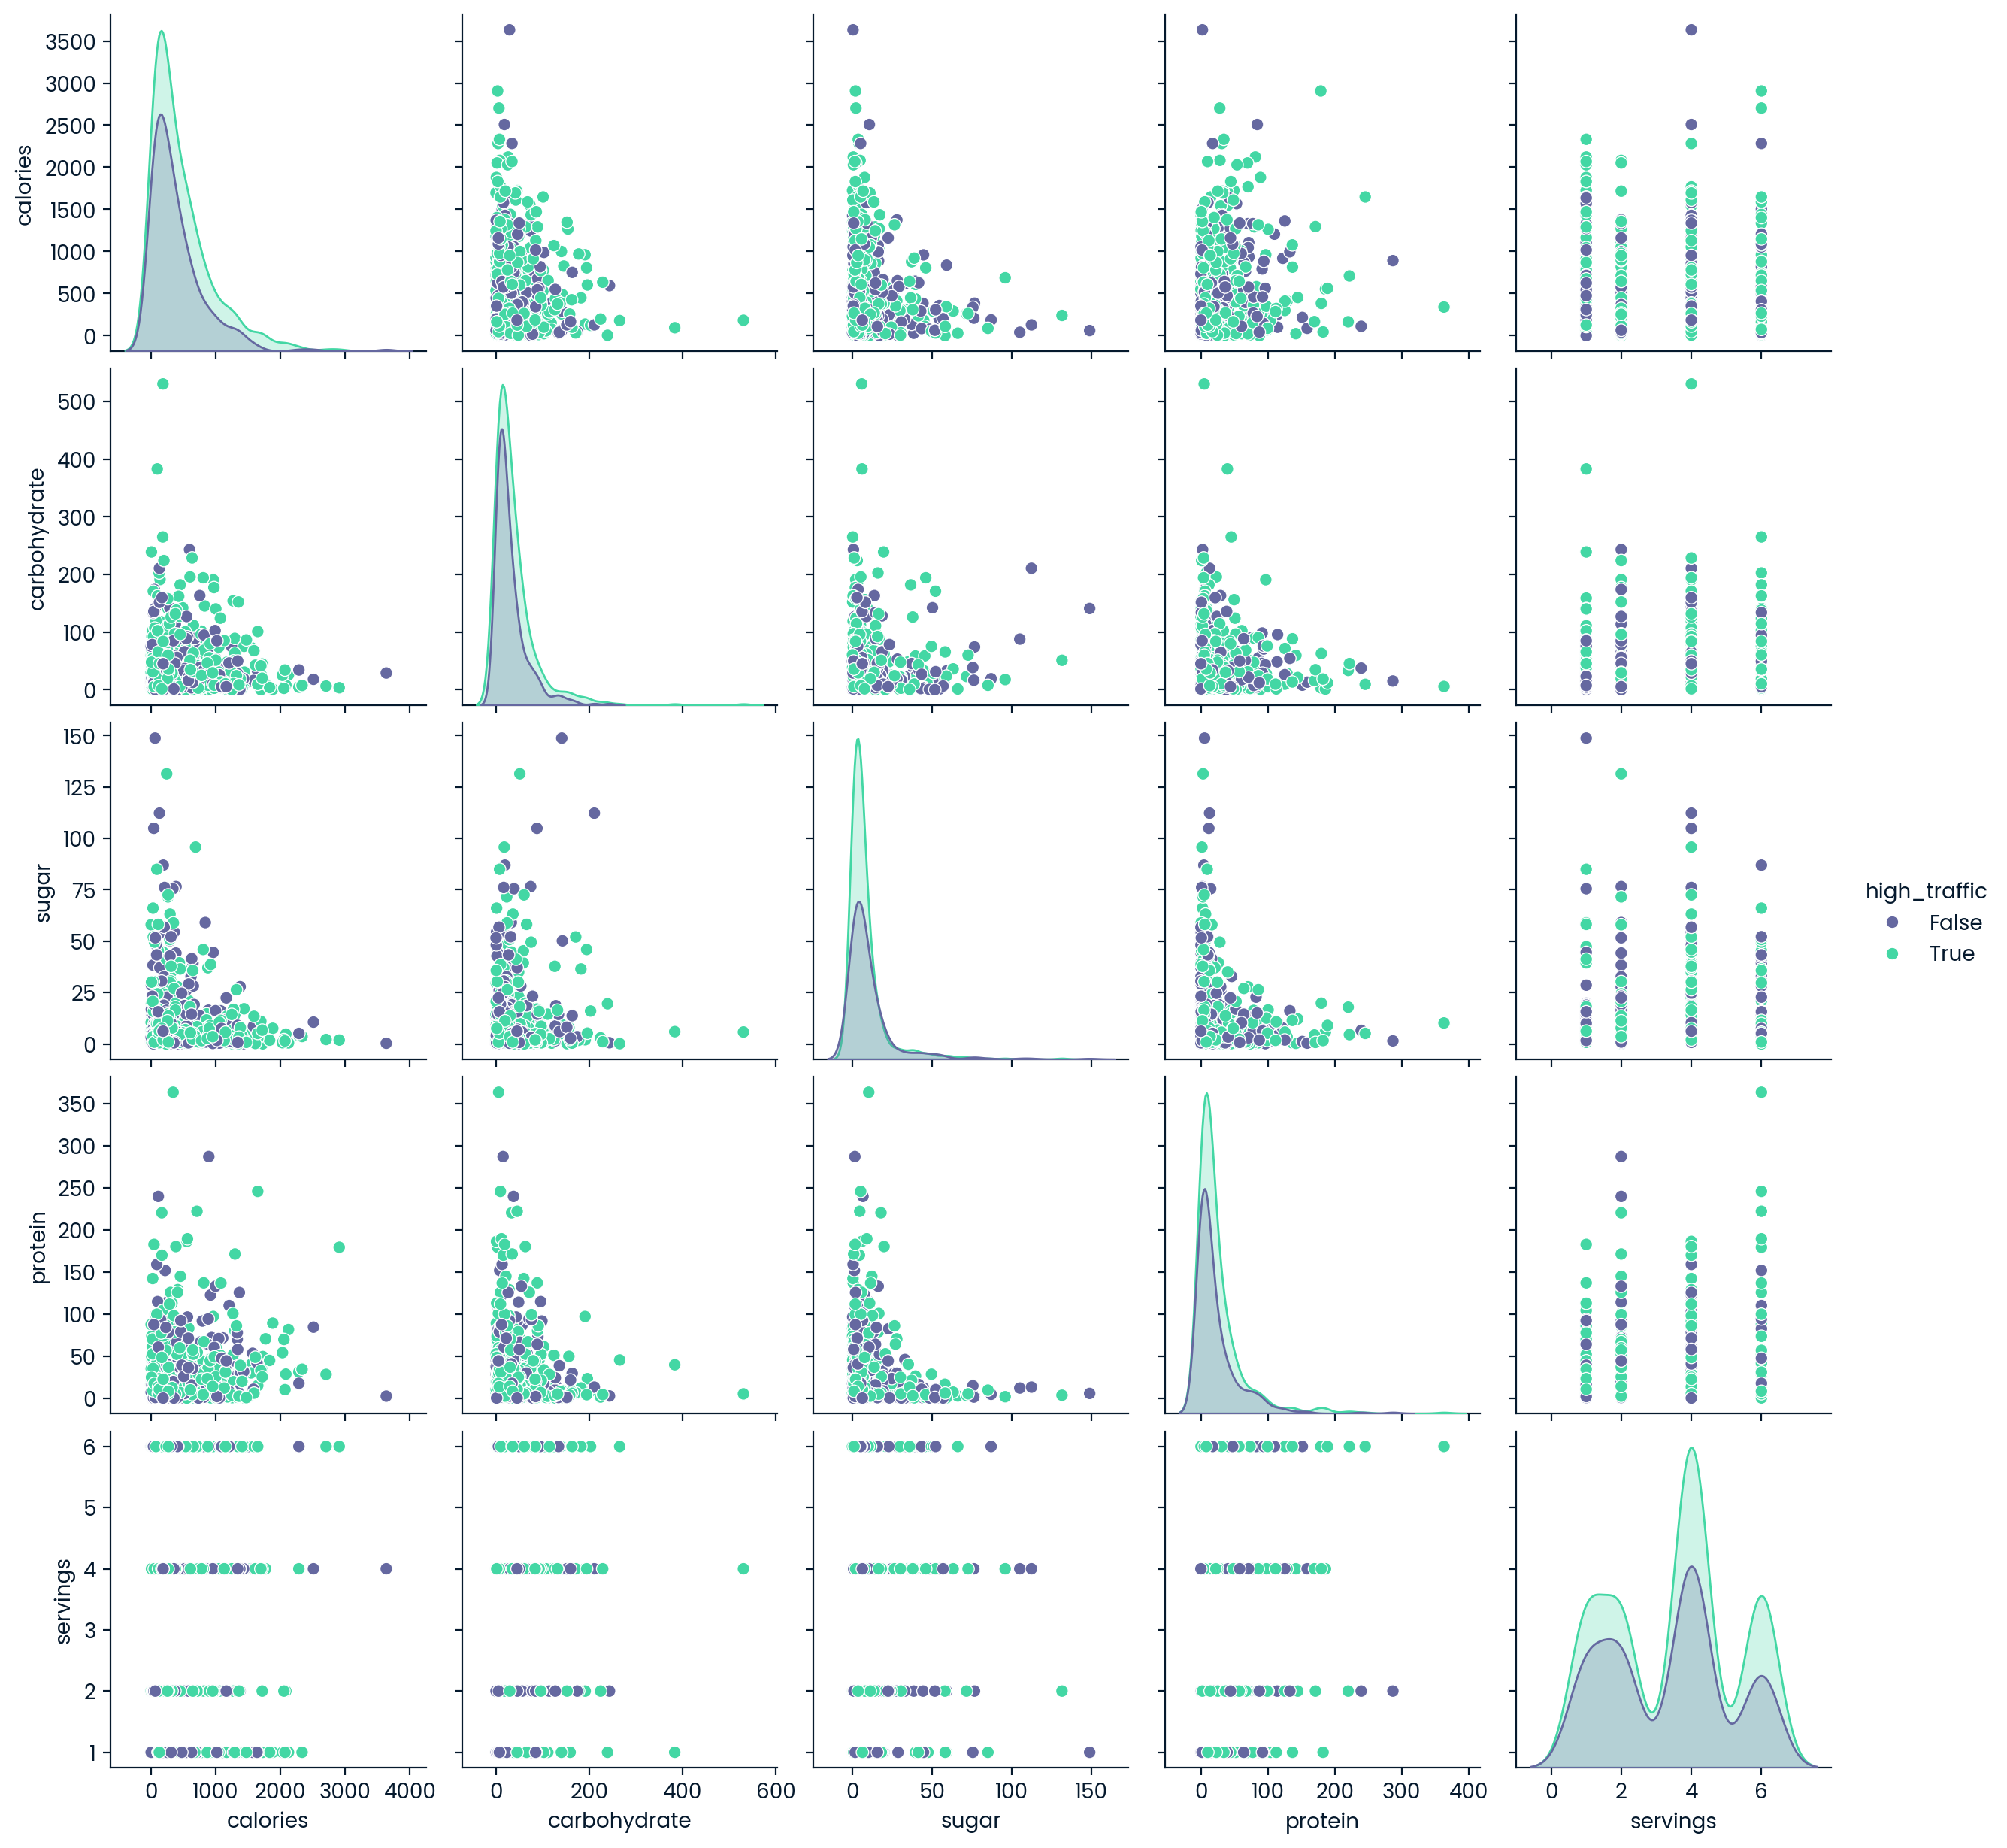

In [19]:
#check the correlation of all features in relation with high_traffic
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[filtered_columns], hue='high_traffic')
plt.show()

- It appears that there is no significant correlation between those feature columns. 
- The data is right-skewed, indicating high possibility of outliers. 
- Data is not normally distributed, so median will be a more representative mearure

## Numerical values

Investigate the distribution of numerical columns

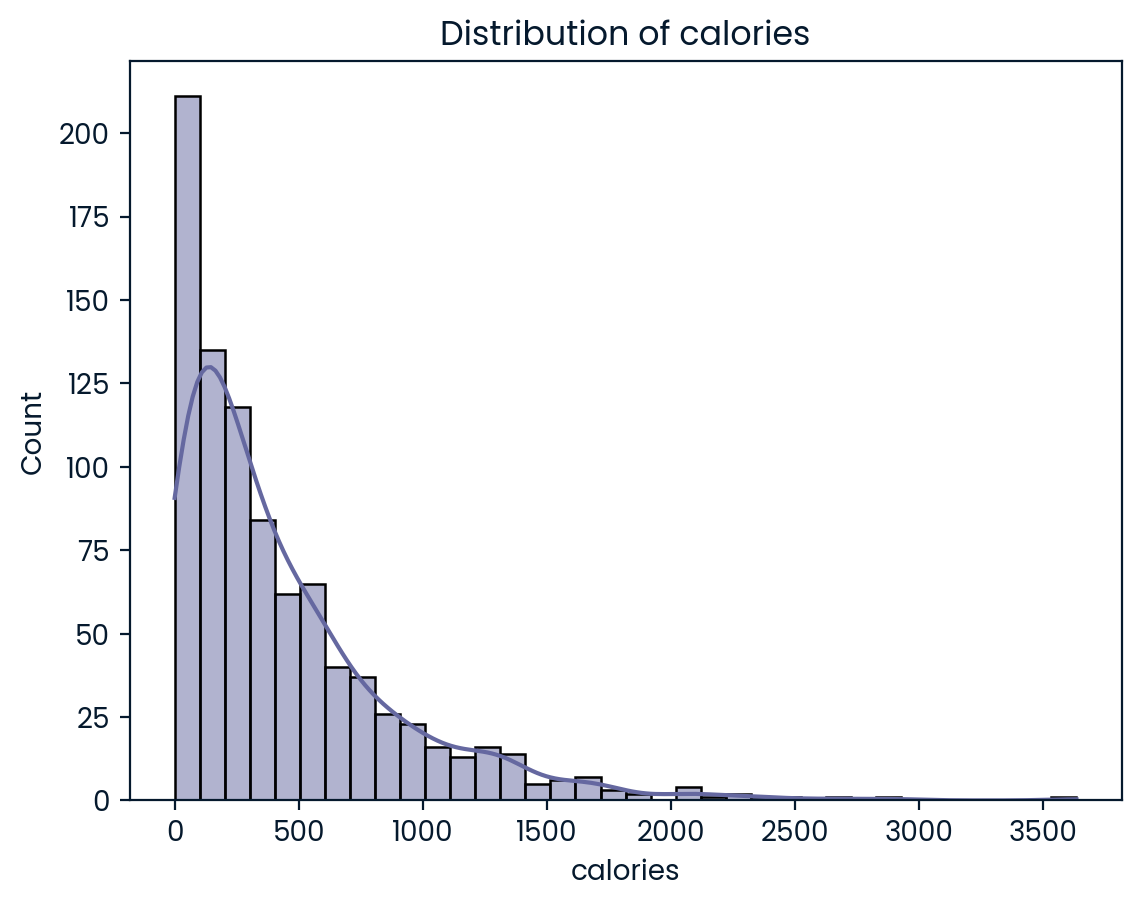

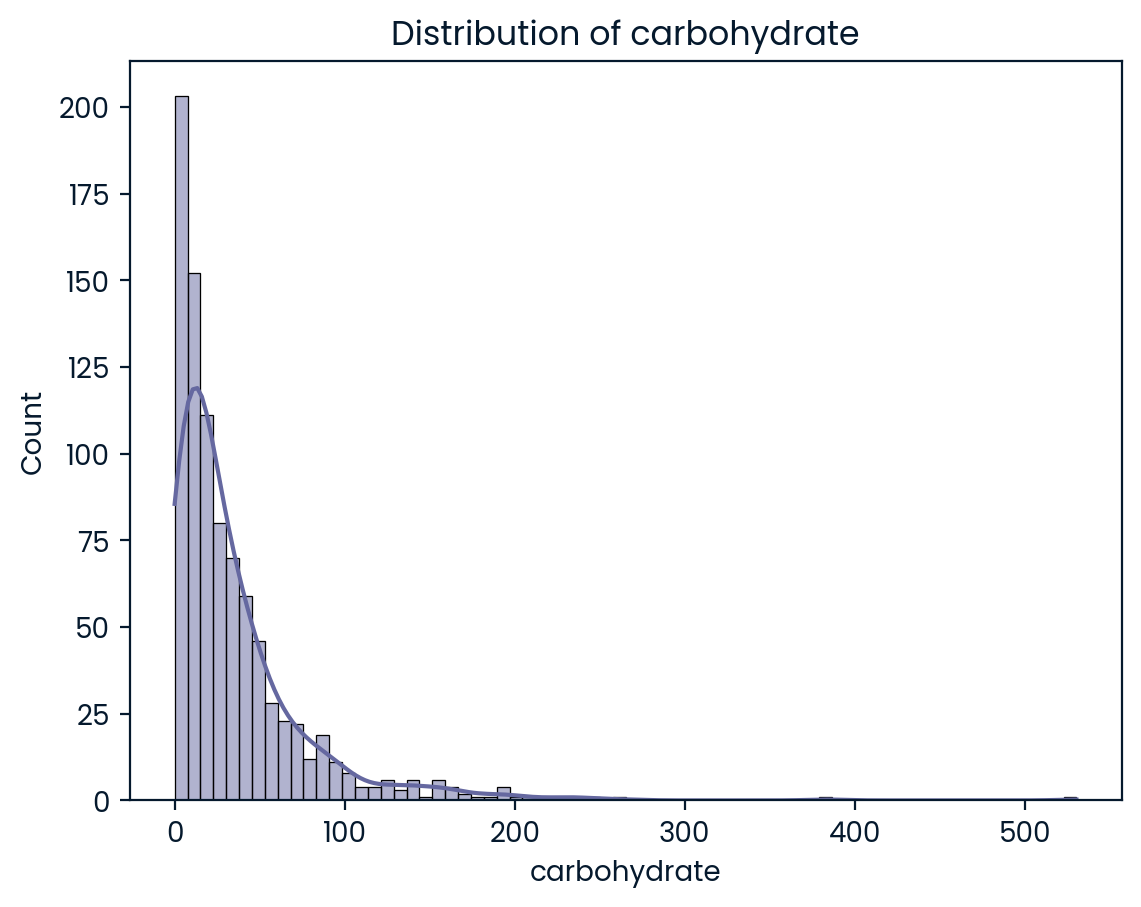

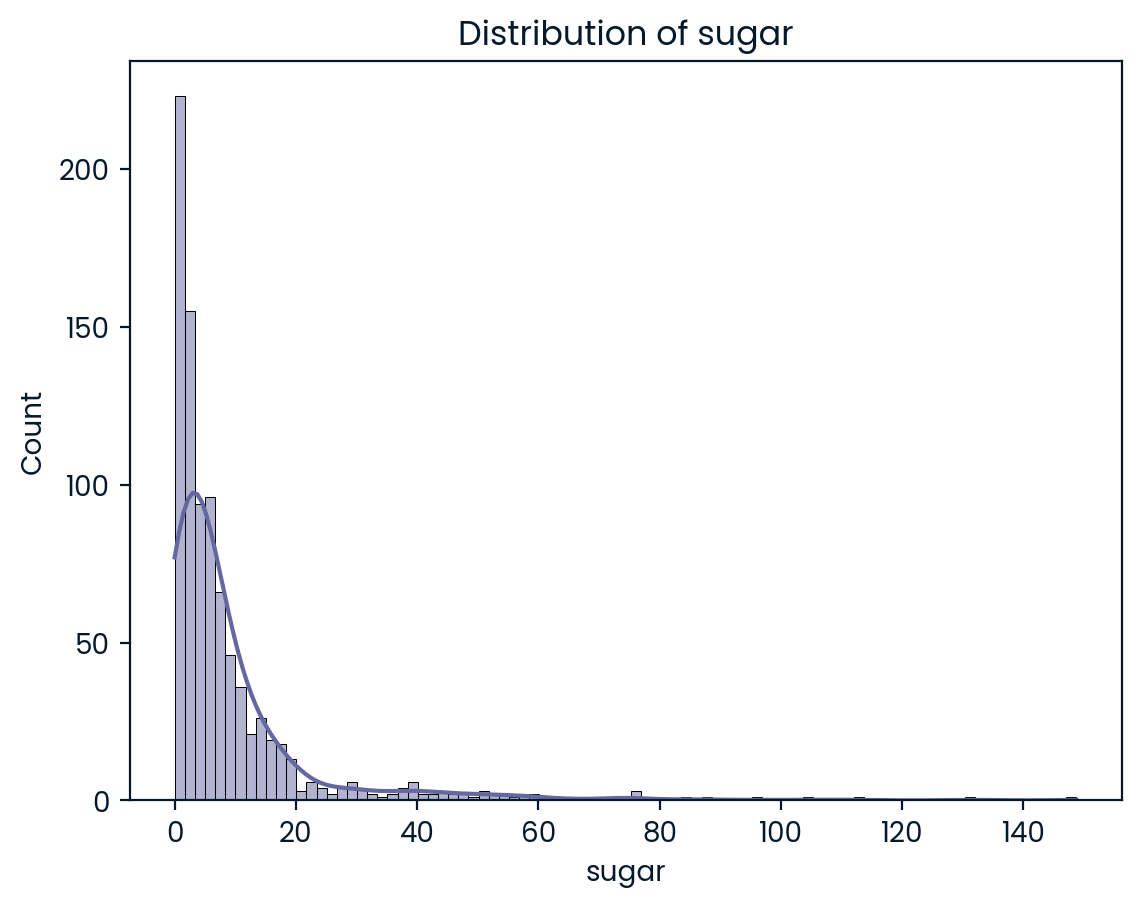

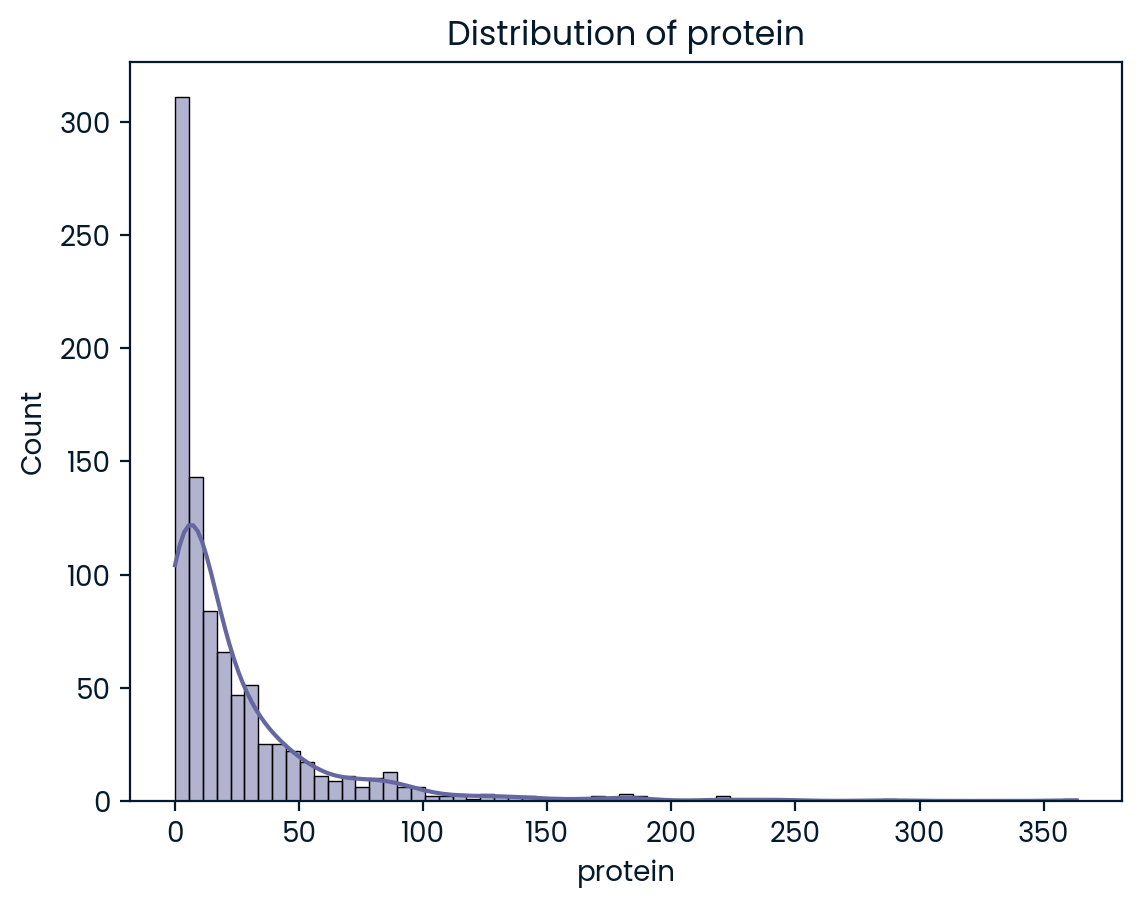

In [20]:
#display the distribution of numerical columns
num_col =  df.select_dtypes(include='float').columns
for col in num_col:
    plt.figure() 
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')  
    plt.show()

The data exhibits a right-skewed distribution, which indicates that lower values are predominantly present and that there is a significant presence of outliers or extreme values on the higher end of the distribution.

## Categorical values

Explore the relationship between categorical columns with the target columns

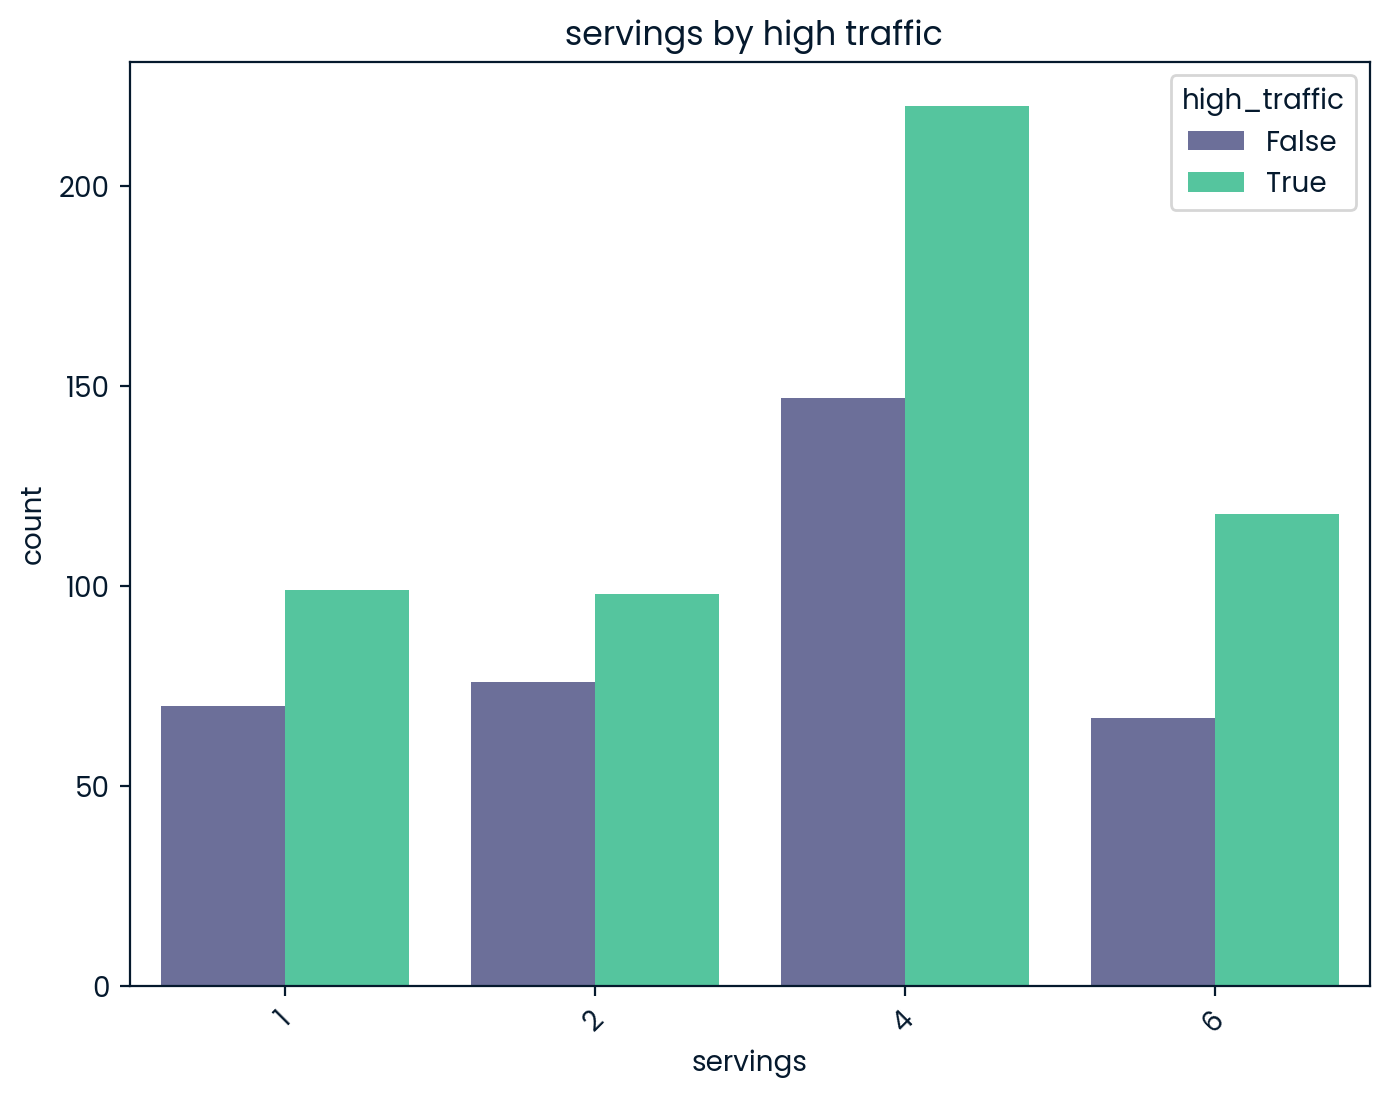

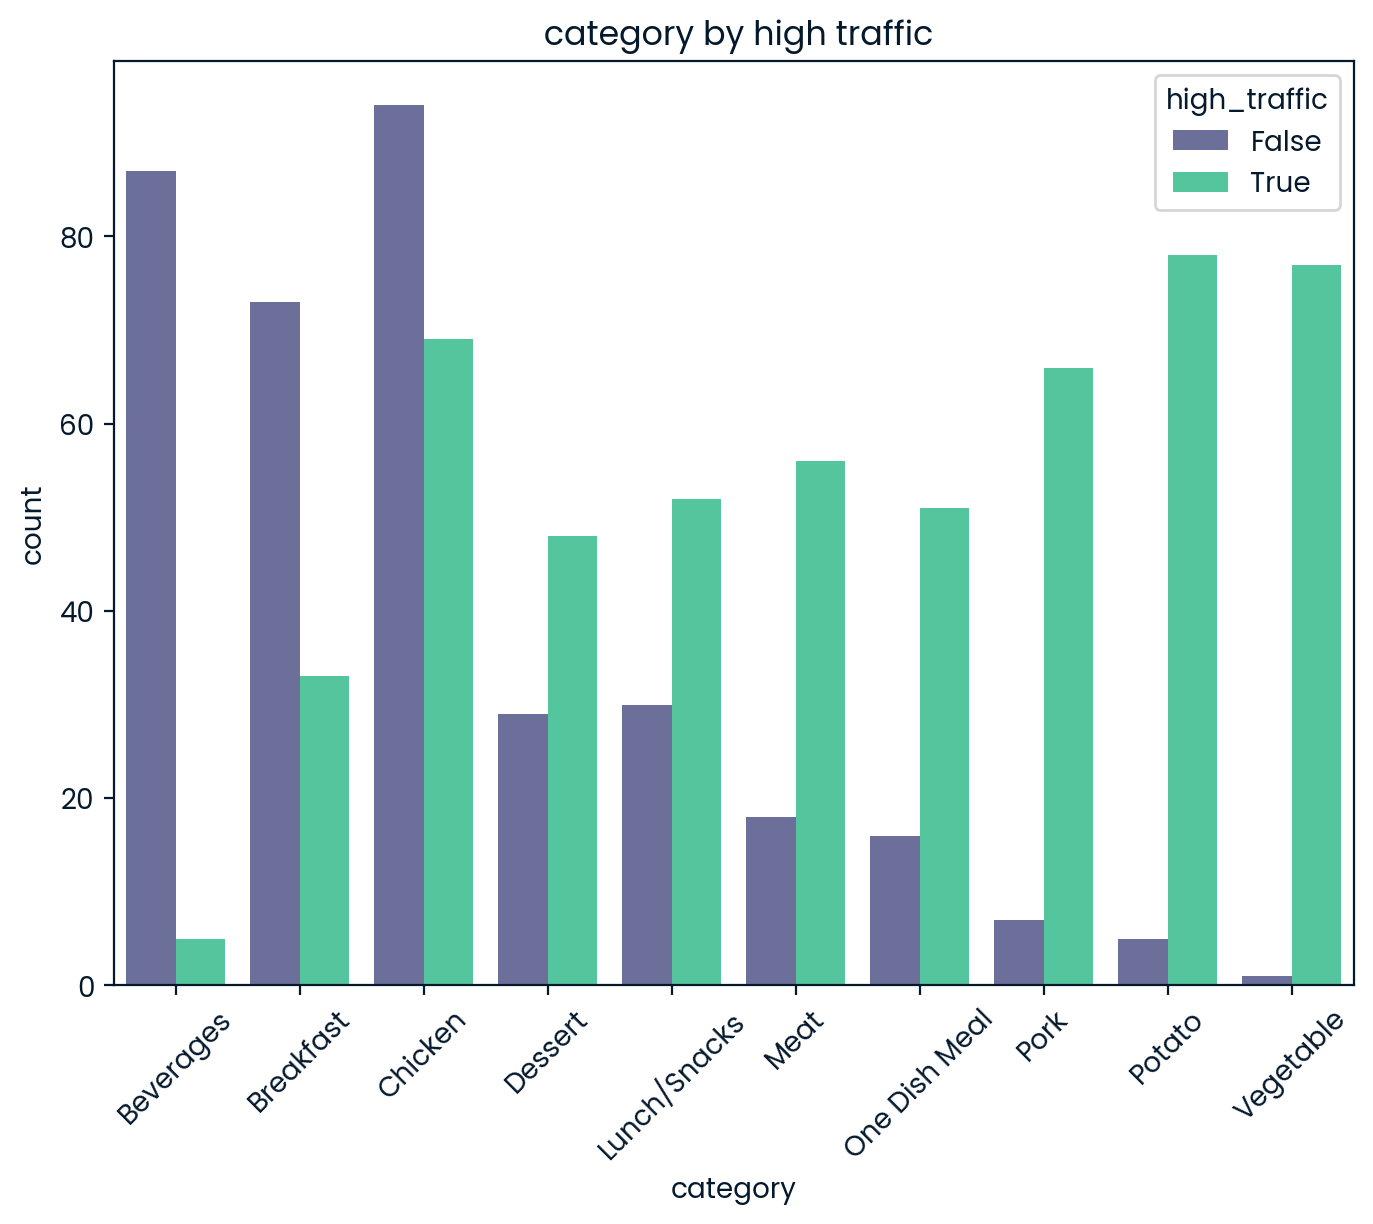

In [21]:
#display the relationships of serving and category with high_traffic
cat_col = ['servings', 'category']
for col in cat_col:
    plt.figure(figsize=(8, 6))  
    sns.countplot(data=df, x=col, hue='high_traffic')
    plt.title(f' {col} by high traffic')
    plt.xticks(rotation=45) 
    plt.show()
    

- It appears that for servings, the recipes with 6 servings exhibit the highest rate of high traffic.
- The top three categories in terms of high traffic are "Vegetable," "Potato," and "Pork." On the other hand, the "Beverages" category appears to have the lowest traffic impact.


## remove outliers

As can be seen from the visualizations, the data is highly influenced by outliers.Therefore, measures need to be taken to address this issue

In [22]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    iqr = q3 - q1

    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

As the histograms have depicted, there are no concerns with respect to low values; however, certain high values require attention.

Various techniques are available to address this issue. Upon evaluation, it's apparent that outright removal of outliers leads to significant data loss, making this approach less favorable.
Similar to capping outliers, the model did not yield the desired distribution.

Therefore, the most ideal solution is to normalize the data to reduce the skewness. Through experimentation with diverse transformation methods including Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, it has been determined that the Yeo-Johnson Transformation is the most effective approach because the data contain various 0 and value that are close to 0, there for it is unsuitable for using  Square Root Transformation, and can lead to potential bias when using Box-Cox (because Box-Cox replace these 0 values with a very small value).


In [23]:
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(df[column])
    outlier_limits[column] = (lower_limit, upper_limit)

In [24]:
#Remove outliers using yeojohnson
from scipy.stats import yeojohnson
numerical_columns =  df.select_dtypes(include='float').columns

transformed_data = df.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits    
    transformed_data[column] = yeojohnson(transformed_data[column])[0]
# Check the filtered dataset
transformed_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.742713,4.409023,0.481476,0.653469,Potato,4,True
1,3,17.437755,4.550612,1.224094,1.360783,Breakfast,1,False
2,4,8.416476,4.091120,2.587147,0.019804,Beverages,4,True
3,5,5.133412,1.101661,0.553884,0.425754,Beverages,4,False
4,6,16.024490,1.607528,0.883720,4.049462,One Dish Meal,2,True


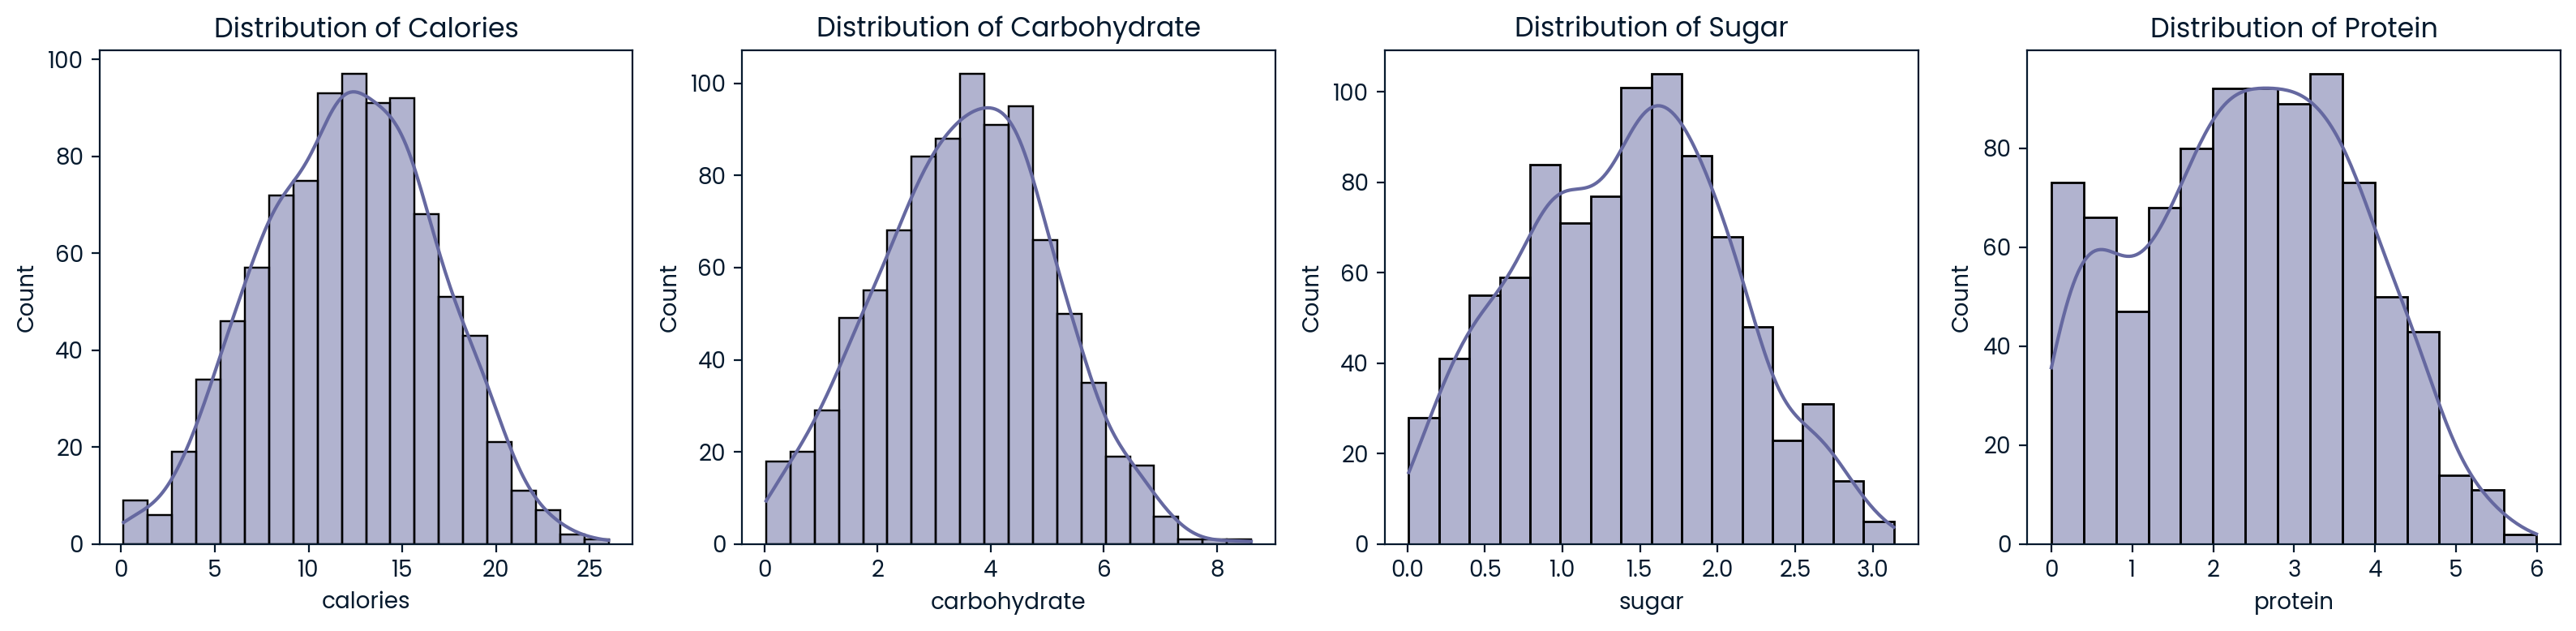

In [25]:
#check the distribution of the newly transformed columns
plt.figure(figsize=(16, 4))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

plt.tight_layout()
plt.show()

These columns have been transformed to be more Gaussian-like and ready to input for machine learning

# Machine Learning

To tackle this issue, we will employ binary classification algorithms within the supervised machine learning framework. We have the option to select a suitable classification model to predict high traffic status. Potential candidates include Logistic Regression, Random Forest, and K-Nearest Neighbors. We will implement and evaluate all these models to determine which one yields the most effective performance.

## Data transformation for machine learning

Coverting categorical value by encoding, so that machine learning algorithm can process 

In [26]:
#encode the category column
encoded_categories = pd.get_dummies(df["category"])

#concatenate the encoded categories with the original dataframe
df_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
df_encoded = df_encoded.drop("category", axis=1)
df_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0


Seperate features and target column

In [27]:
#split the data into features (X) and target variable (y)
X = df_encoded.drop("high_traffic", axis=1)
y = df_encoded["high_traffic"]

Slit the data set into train set to train the models and test set to validate the performances of them

In [101]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=55)

### importing models

In [102]:
#import the aforementioned models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [103]:
#create a dictionary with keys are model names and values are their instantiation code. 
model = {'Logistic_Regression': LogisticRegression(random_state= 55), 
         'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance'), 
         'Random_Forest': RandomForestClassifier(random_state=55)}


In [140]:
#import necessary metrics for evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Input the train set for training, make prediction and use the test set to evaluate. This process is iterated over the three models. Their evaluation metrics is store in a dictionary call 'results' and print out

In [105]:
# Dictionary to store results
results = {}

# Iterate over the models
for name, model in model.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the training data
    y_train_pred = model.predict(X_train)
    
    # Predict on the test data
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    
    # Calculate evaluation metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Store the results
    results[name] = {
        'Train': {
            'Accuracy': train_accuracy,
            'Precision': train_precision,
            'Recall': train_recall,
            'F1 Score': train_f1,
            'Confusion Matrix': train_conf_matrix
        },
        'Test': {
            'Accuracy': test_accuracy,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1 Score': test_f1,
            'Confusion Matrix': test_conf_matrix
        }
    }

# Print out all metrics for both the train and test sets
for name, metrics in results.items():
    print(f'{name} Metrics:')
    print('  Train Set:')
    print(f'    Accuracy: {metrics["Train"]["Accuracy"]:.2f}')
    print(f'    Precision: {metrics["Train"]["Precision"]:.2f}')
    print(f'    Recall: {metrics["Train"]["Recall"]:.2f}')
    print(f'    F1 Score: {metrics["Train"]["F1 Score"]:.2f}')
    print(f'    Confusion Matrix:\n{metrics["Train"]["Confusion Matrix"]}')
    print('  Test Set:')
    print(f'    Accuracy: {metrics["Test"]["Accuracy"]:.2f}')
    print(f'    Precision: {metrics["Test"]["Precision"]:.2f}')
    print(f'    Recall: {metrics["Test"]["Recall"]:.2f}')
    print(f'    F1 Score: {metrics["Test"]["F1 Score"]:.2f}')
    print(f'    Confusion Matrix:\n{metrics["Test"]["Confusion Matrix"]}\n')


Logistic_Regression Metrics:
  Train Set:
    Accuracy: 0.76
    Precision: 0.80
    Recall: 0.81
    F1 Score: 0.80
    Confusion Matrix:
[[200  88]
 [ 82 346]]
  Test Set:
    Accuracy: 0.78
    Precision: 0.83
    Recall: 0.79
    F1 Score: 0.81
    Confusion Matrix:
[[54 18]
 [22 85]]

KNN Metrics:
  Train Set:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    Confusion Matrix:
[[288   0]
 [  0 428]]
  Test Set:
    Accuracy: 0.54
    Precision: 0.60
    Recall: 0.69
    F1 Score: 0.64
    Confusion Matrix:
[[23 49]
 [33 74]]

Random_Forest Metrics:
  Train Set:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1 Score: 1.00
    Confusion Matrix:
[[288   0]
 [  0 428]]
  Test Set:
    Accuracy: 0.76
    Precision: 0.77
    Recall: 0.85
    F1 Score: 0.81
    Confusion Matrix:
[[45 27]
 [16 91]]



- From a business standpoint, misclassifying a high-traffic recipe as low traffic presents a more critical error than the reverse. Consequently, our focus is on optimizing model precision, as underestimating the traffic potential of a recipe could result in significant business losses.
- With that viewpoint, logistic regression seems to perform the best with the highest precision and the overall accuracy score on the test set. Other metrics of the test set of this model are also the highest.
- K-Nearest Neighbor seem to suffer from overfitting since its performance was perfect on the train set but just as poor as random guesting in the test set
- Random Forest Classifiers also get overfitting but less significant than KNN since the performance in the test set reach around 75%

## KPI

Define KPI from business criteria to compare performance of the three models.


In [141]:
#extract the metrics of the three models
logreg_evaluation_metrics = results.get('Logistic_Regression')
knn_evaluation_metrics = results.get('KNN')
rf_evaluation_metrics = results.get('Random_Forest')


As already mentioned, misclassifying a high-traffic recipe as low traffic presents a more critical error and can lead to business loss. Therefore, a KPI call High Traffic Success Ratio was defined by dividing correctly classified high_traffic (True Positives) with wrongly classified high_traffic (False Positive).

In [136]:
#Defining KPI by deviding TP for FP
def Correct_High_Traffic_Ratio(confusion_matrix):
    # Extract True Positives (TP) and False Positives (FP) from the confusion matrix
    TP = confusion_matrix[1, 1]  # True Positives
    FP = confusion_matrix[0, 1]  # False Positives
    return TP / FP


Use the KPI for comparing models

In [137]:
# KPI calculation for Logistic Regression
logreg_train_kpi = Correct_High_Traffic_Ratio(logreg_evaluation_metrics['Train']['Confusion Matrix'])
logreg_test_kpi = Correct_High_Traffic_Ratio(logreg_evaluation_metrics['Test']['Confusion Matrix'])

# KPI calculation for Random Forest
rf_train_kpi = Correct_High_Traffic_Ratio(rf_evaluation_metrics['Train']['Confusion Matrix'])
rf_test_kpi = Correct_High_Traffic_Ratio(rf_evaluation_metrics['Test']['Confusion Matrix'])

# KPI calculation for K-Nearest Neighbors
knn_train_kpi = Correct_High_Traffic_Ratio(knn_evaluation_metrics['Train']['Confusion Matrix'])
knn_test_kpi = Correct_High_Traffic_Ratio(knn_evaluation_metrics['Test']['Confusion Matrix'])
# Output the KPI values
print(f"Correct High Traffic Ratio for Logistic Regression Train : {logreg_train_kpi:.2f}")
print(f"Correct High Traffic Ratio for Logistic Regression Test: {logreg_test_kpi:.2f}")
print(f"Correct High Traffic Ratio for Random Forest Train: {rf_train_kpi:.2f}")
print(f"Correct High Traffic Ratio for Random Forest Test: {rf_test_kpi:.2f}")
print(f"Correct High Traffic Ratio for K Neighbors Train: {knn_train_kpi:.2f}")
print(f"Correct High Traffic Ratio for K Neighbors Test : {knn_test_kpi:.2f}")





Correct High Traffic Ratio for Logistic Regression Train : 3.93
Correct High Traffic Ratio for Logistic Regression Test: 4.72
Correct High Traffic Ratio for Random Forest Train: inf
Correct High Traffic Ratio for Random Forest Test: 3.37
Correct High Traffic Ratio for K Neighbors Train: inf
Correct High Traffic Ratio for K Neighbors Test : 1.51


- As the results illustrated, Logistic Regression has the highest ratio with the correctly predict almost fourfold in the train set and Cfivefold in the test set
- The train set of Random Forest due to overfitting is inf, same for K Neighbors
- However, the performance on the test set of those two models is not as good as that of Logistic Regression

# Conclusion

In conclusion, we developed and evaluated several models to achieve our goal, with the logistic regression model emerging as the top performer. This model demonstrated the highest efficacy in predicting high-traffic recipes, achieving an accuracy of approximately 80%. 

From a business standpoint, misclassifying a high-traffic recipe as low traffic presents a more critical risk than the reverse. Therefore, our primary focus has been on maximizing model precision, as underestimating traffic potential could lead to significant business losses.

Additionally, we introduced a custom Key Performance Indicator (KPI), termed the 'Correct High Traffic Ratio,' based on the results from our baseline model. This KPI was used to compare the performance of the various models.

Our exploratory analysis also identified specific recipe categories with consistent traffic trends. Recipes in the 'Vegetable,' 'Potato,' and 'Pork' categories frequently generate high traffic, making them ideal candidates for website promotion. In contrast, 'Beverages' typically result in lower traffic, indicating they may not be suitable for prominent placement on the platform.